In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filname):
    img = cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

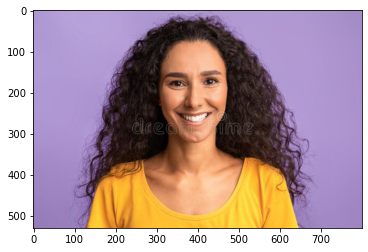

In [54]:
filename="image.jpg"
img=read_file(filename)

org_img =np.copy(img)

CREATE EDGE MASK

In [55]:
def edge_mask(img,line_size,blur_value):
    """
    input:input Image
    output:Edges of Images
    """
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    
    edges =cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

<function matplotlib.pyplot.show(close=None, block=None)>

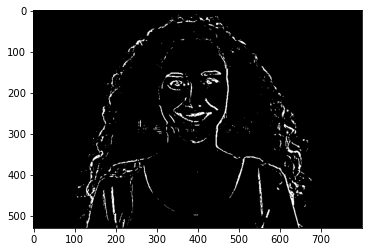

In [56]:
line_size,blur_value = 7,7
edges=edge_mask(img, line_size, blur_value)

plt.imshow(edges,cmap="binary")
plt.show

 Reduce the Color Palatte

In [57]:
def color_quantization(img,k):
    #Transform the image
    data =np.float32(img).reshape((-1,3))
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    #Implementing K Means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

<function matplotlib.pyplot.show(close=None, block=None)>

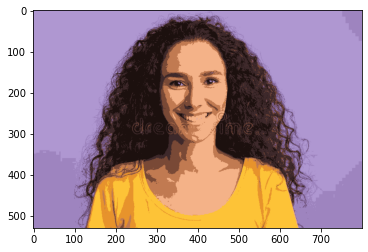

In [58]:
img=color_quantization(img,k=10)#k is no of colors

plt.imshow(img)
plt.show

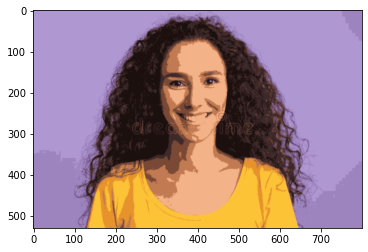

In [59]:
#Reduce the noise
blurred = cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

MERGE IMAGES THAT ARE QUANTIZED AND EDGE MASK

In [64]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()
    
    plt.imshow(org_img)
    plt.title("Orginal Image")
    plt.show()
    

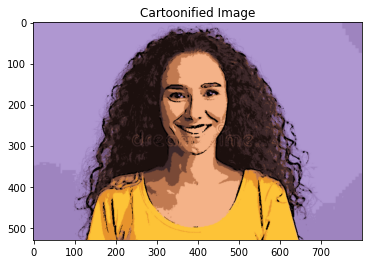

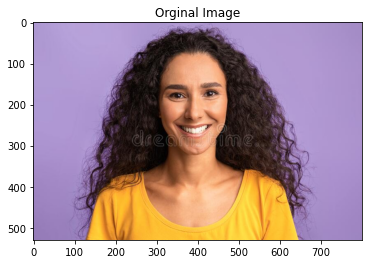

In [65]:
cartoon()